In [1]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)

In [2]:
datadir = Path("../data/")
etccdi_presentf = datadir / "Climate"/ "ISEA3H09_CCSM4_Y1950_Y2000_ETCCDI_IDW1N10.txt"

# Exploring the ETCCDI climate variables

These variables were derived by aggregating ETCCDI variables of the CCSM4 grid cells into ISEA3H09. The interpolation method was  IDW that maps the 10 nearest CCSM4 grid cells to one ISEA3H09 hexagon centroid.

## Table of contents:
Exploring the entire set (only 1950-2000 as of Nov 2021):
* [1. Visualizing histograms](#1950-2000hist)
    * [1-1. Precipitation related variables, measured in days (R10MM, R1MM, R20MM, CDD, CWD, CSDI, WSDI)](#precp_days_group)
    * [1-2. Precipitation related variables, measured in mm (PRCPTOT, R95P, R99P, RX1DAY, RX5DAY, SDII)](#precp_mm_group)
    * [1-3. Temperature related variables, measured in days ( FD, ID, SU, TR, GSL)](#temp_days_group)
    * [1-4. Temperature related variables, measured in percentages (TN10P, TN90P, TX10P, TX90P)](#temp_pct_group)
    * [1-5. Temperature related variables, measured in degrees (TNN, TNX, TXN, TXX, DTR)](#temp_deg_group)
* [ 2. Visualizing the correlation matrix](#1950-2000corr)

Exploring the variables for planned training and test areas:
* [ 3. Visualizing histograms](#modelarea-hist)
* [ 4. Visualizing the correlation matrix](#model-corr)

## I. Exploring the entire dataset

In [3]:
# reading the data
present = pd.read_csv(etccdi_presentf, sep="\t")
present.sample(5)

,HID,CDD_IDW1N10,CSDI_IDW1N10,CWD_IDW1N10,DTR_IDW1N10,FD_IDW1N10,GSL_IDW1N10,ID_IDW1N10,PRCPTOT_IDW1N10,R10MM_IDW1N10,R1MM_IDW1N10,R20MM_IDW1N10,R95P_IDW1N10,R99P_IDW1N10,RX1DAY_IDW1N10,RX5DAY_IDW1N10,SDII_IDW1N10,SU_IDW1N10,TN10P_IDW1N10,TN90P_IDW1N10,TNN_IDW1N10,TNX_IDW1N10,TR_IDW1N10,TX10P_IDW1N10,TX90P_IDW1N10,TXN_IDW1N10,TXX_IDW1N10,WSDI_IDW1N10
94103,94104,18.112262,8.111980,11.041800,5.227468,227.953173,72.283548,181.664014,700.346324,16.139221,150.291091,2.528535,148.472953,46.112433,29.663838,55.816980,4.662965,1.583719,12.145860,9.601751,-31.175887,13.000874,0.000000,11.945306,9.701677,-26.679647,20.814460,3.757575
89902,89903,36.825385,7.887378,5.190419,4.024046,362.165996,0.000000,340.201143,174.732684,0.797620,72.446116,0.068050,36.196596,12.223663,11.806394,20.613132,2.403700,0.000000,9.786444,11.084071,-45.301947,0.452605,0.000000,9.751136,10.871445,-42.760427,1.981917,4.455248
137622,137623,6.872026,4.015454,19.286511,4.141433,271.081912,0.000000,145.647101,931.258969,10.476375,250.956160,0.605715,161.135478,46.734595,20.737944,39.704615,3.709700,0.000000,9.956160,10.806595,-22.048591,3.764730,0.000000,10.093038,10.717640,-17.702699,5.734395,1.661375
98359,98360,39.917238,11.919625,28.326379,0.548976,0.000000,365.000000,0.000000,1233.694667,32.309777,187.194239,11.559711,357.126722,120.530850,65.677506,154.288332,6.577857,328.840713,11.287649,11.843864,23.129220,28.566368,365.000000,11.336912,11.988799,23.864076,28.990965,16.724064
96013,96014,23.326178,11.058233,14.200455,0.835430,0.000000,365.000000,0.000000,849.839669,21.839879,145.065282,7.667826,242.118992,81.980040,55.724292,116.581930,5.809859,158.242980,10.377016,13.578290,17.130285,27.534271,320.318122,10.571760,13.535903,18.078602,27.997159,17.330556


In [4]:
# basic statistics, something weird about CDD's max value
present.describe(include="all")

,HID,CDD_IDW1N10,CSDI_IDW1N10,CWD_IDW1N10,DTR_IDW1N10,FD_IDW1N10,GSL_IDW1N10,ID_IDW1N10,PRCPTOT_IDW1N10,R10MM_IDW1N10,R1MM_IDW1N10,R20MM_IDW1N10,R95P_IDW1N10,R99P_IDW1N10,RX1DAY_IDW1N10,RX5DAY_IDW1N10,SDII_IDW1N10,SU_IDW1N10,TN10P_IDW1N10,TN90P_IDW1N10,TNN_IDW1N10,TNX_IDW1N10,TR_IDW1N10,TX10P_IDW1N10,TX90P_IDW1N10,TXN_IDW1N10,TXX_IDW1N10,WSDI_IDW1N10
count,196832.00000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000
mean,98416.50000,53.461916,5.921488,19.448150,3.913968,66.152896,283.407494,49.761787,1027.460573,28.711493,154.435523,8.879405,236.388862,75.945661,43.664978,92.993421,5.987150,134.004543,10.170603,11.166394,1.226858,20.310472,159.527339,10.198060,11.146702,4.758275,24.631820,8.267821
std,56820.64843,120.135759,3.414841,16.634862,3.965489,119.556650,136.089634,105.124877,740.698730,26.403323,74.932983,10.030891,174.392344,57.529881,24.547932,59.347809,2.390525,145.094095,0.658983,0.724655,23.936553,10.356050,156.289682,0.653036,0.753927,22.663115,11.696714,5.638105
min,1.00000,4.009007,0.067093,0.042284,0.407698,0.000000,0.000000,0.000000,0.055981,0.000000,0.042284,0.000000,0.000000,0.000000,0.669288,1.662915,0.053741,0.000000,7.797225,8.633949,-74.617955,-30.565328,0.000000,8.091539,8.599853,-72.497892,-25.841064,0.022317
25%,49208.75000,13.973389,3.384982,8.654831,0.669764,0.000000,223.528982,0.000000,487.364333,8.249519,104.463420,1.042032,106.375416,33.203361,23.241466,45.351262,4.036451,0.000000,9.750012,10.688299,-9.019107,16.460489,0.014944,9.801452,10.638720,-4.050492,20.446503,4.176016
50%,98416.50000,23.761283,5.672391,13.472844,1.979585,0.000000,365.000000,0.000000,951.884730,22.361179,155.981161,5.309775,204.332062,63.245950,40.070109,78.636339,5.765742,66.131205,10.141659,11.115011,9.166234,24.193069,113.964472,10.168131,11.054468,13.112167,27.765465,7.481039
75%,147624.25000,53.208218,7.945608,25.749495,6.539862,72.862497,365.000000,12.526608,1349.030337,40.499057,208.386895,13.536889,323.305303,104.938461,61.973293,130.848140,7.720937,289.566001,10.540513,11.598794,20.429288,27.705534,361.674213,10.574305,11.588533,22.460634,30.087498,11.377216
max,196832.00000,11719.647151,22.658614,192.748037,15.882537,365.000000,365.000000,365.000000,6041.701696,197.288133,340.268278,108.359245,1299.631735,399.696169,177.918199,486.991962,22.302361,365.000000,13.330696,15.019223,26.222249,36.102259,365.000000,13.138606,14.961791,27.597581,51.419834,34.264405


In [5]:
# check for missing data - seems to be none
present.isnull().values.any()

False

### 1. Visualizing histograms <a class="anchor" id="1950-2000hist"></a>

In [6]:
# Roughly splitting the indices into groups by what they are measuring and the units of measurement

# precipitation related, measured in days: R10MM, R1MM, R20MM, CDD, CWD, CSDI, WSDI
precp_days_group = ["R10MM_IDW1N10", "R1MM_IDW1N10", "R20MM_IDW1N10", "CDD_IDW1N10", 
                    "CWD_IDW1N10", "CSDI_IDW1N10", "WSDI_IDW1N10"]

# precipitation related, measured in mm: PRCPTOT, R95P, R99P, RX1DAY, RX5DAY, SDII
precp_mm_group = ["PRCPTOT_IDW1N10","R95P_IDW1N10","R99P_IDW1N10", "RX1DAY_IDW1N10",
                  "RX5DAY_IDW1N10", "SDII_IDW1N10"]

# temperature related, measured in days: FD, ID, SU, TR, GSL
temp_days_group = ["FD_IDW1N10", "ID_IDW1N10", "SU_IDW1N10", "TR_IDW1N10", "GSL_IDW1N10"]

# temperature related, measured in percentages: TN10P, TN90P, TX10P, TX90P
temp_pct_group = ["TN10P_IDW1N10", "TN90P_IDW1N10", "TX10P_IDW1N10", "TX90P_IDW1N10"]

# temperature related, measured in degrees: TNN, TNX, TXN, TXX, DTR
temp_deg_group = ["TNN_IDW1N10", "TNX_IDW1N10", "TXN_IDW1N10", "TXX_IDW1N10", "DTR_IDW1N10"]

#### 1-1. Precipitation related variables, measured in days: R10MM, R1MM, R20MM, CDD, CWD, CSDI, WSDI <a class="anchor" id="precp_days_group"></a>

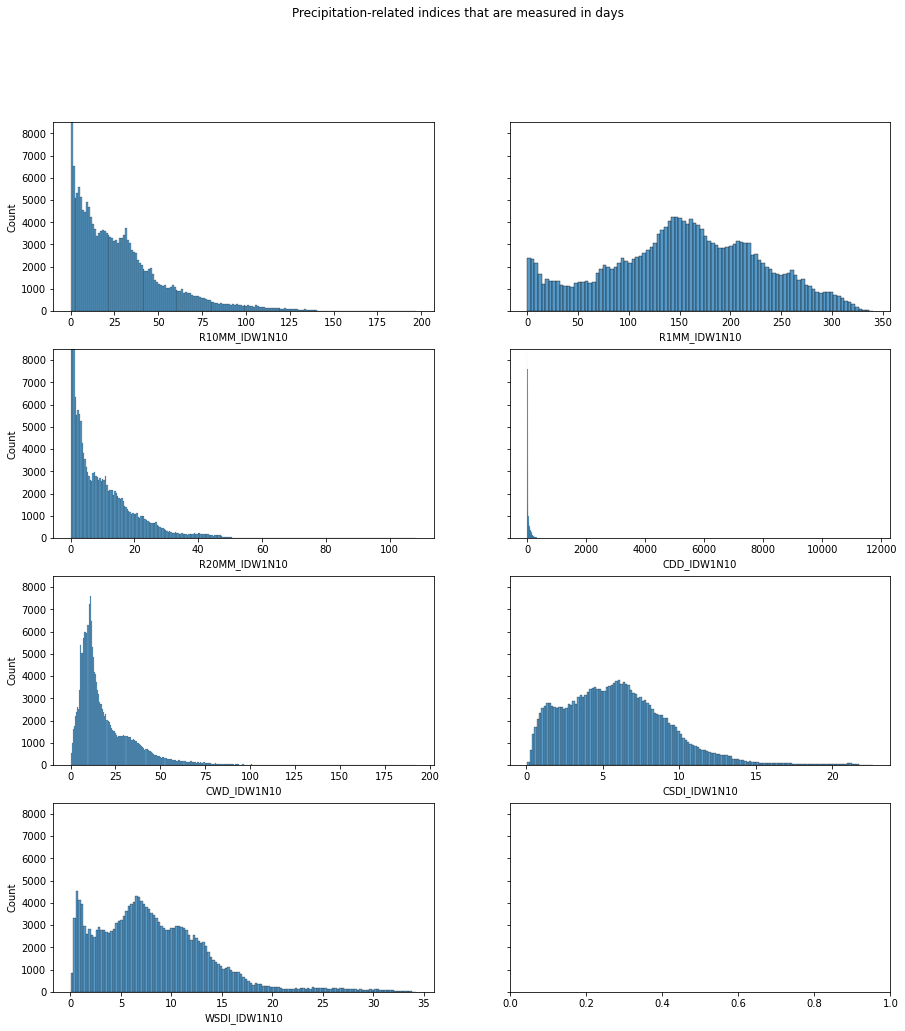

In [7]:
# definitely something off about CDD, will export to CSV to visualize in QGIS
fig, axes = plt.subplots(4, 2, figsize=(15, 16),sharey=True)
plt.ylim((0,8500))
fig.suptitle('Precipitation-related indices that are measured in days')

for idx,ax in zip(precp_days_group, axes.flat):
    sns.histplot(ax=ax,data=present[idx])

In [8]:
# 1903 hexagons with max length of dry spell > 365
present[present["CDD_IDW1N10"]>365].HID.nunique()

1903

In [9]:
# saving CDD_outliers to file for visualization in QGIS
CDD_outliers = present[present["CDD_IDW1N10"]>365]
CDD_outliers.drop(CDD_outliers.columns.difference(['HID',"CDD_IDW1N10"]), 1,inplace=True)
CDD_outliers["value_over365"] = 1

#CDD_outliers.to_csv("cdd_outliers.csv", index=False)

/Users/t-r-espr/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-9-8e08ea8dffa9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CDD_outliers["value_over365"] = 1


**QGIS Visualization results:**

Still need to confirm that the period for all variables was "year", but at least for the CDD outliers, I can ignore them because they are not areas of interest in my training or test data.

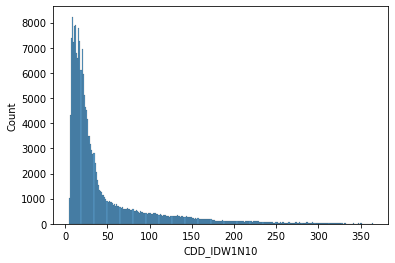

In [10]:
# re-visualizing CDD without outliers
sns.histplot(data=present[present["CDD_IDW1N10"]<=365].CDD_IDW1N10)
plt.show()

#### 1-2. Precipitation related variables, measured in mm: PRCPTOT, R95P, R99P, RX1DAY, RX5DAY, SDII <a class="anchor" id="precp_mm_group"></a>

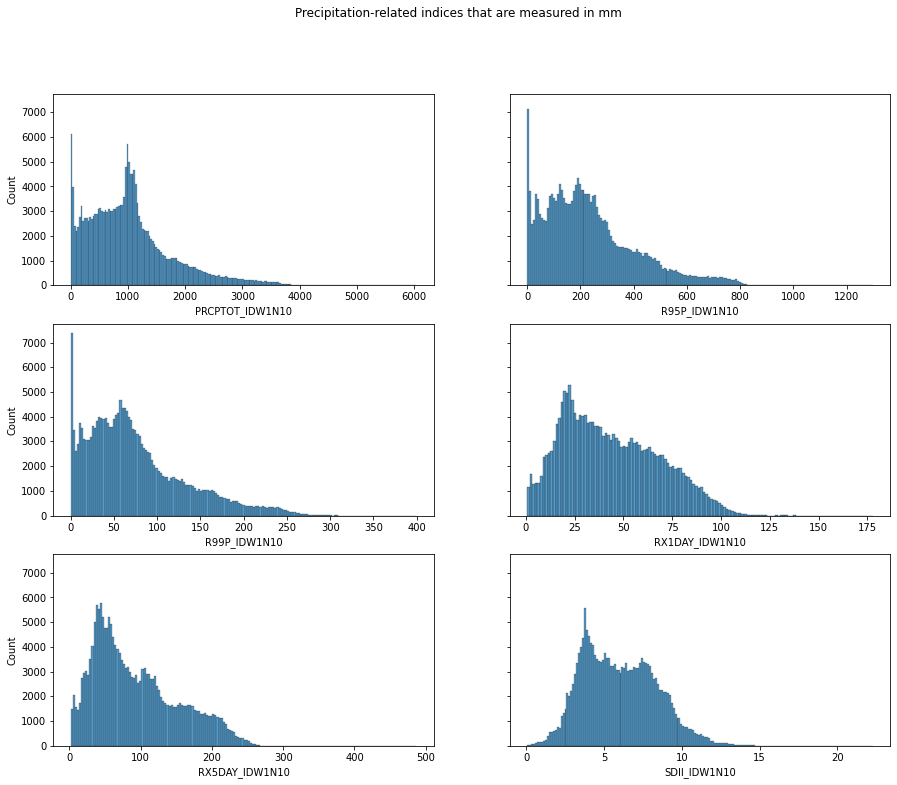

In [11]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12),sharey=True)
fig.suptitle('Precipitation-related indices that are measured in mm')

for idx,ax in zip(precp_mm_group, axes.flat):
    sns.histplot(ax=ax,data=present[idx])

#### 1-3. Temperature related variables, measured in days: FD, ID, SU, TR, GSL<a class="anchor" id="temp_days_group"></a>

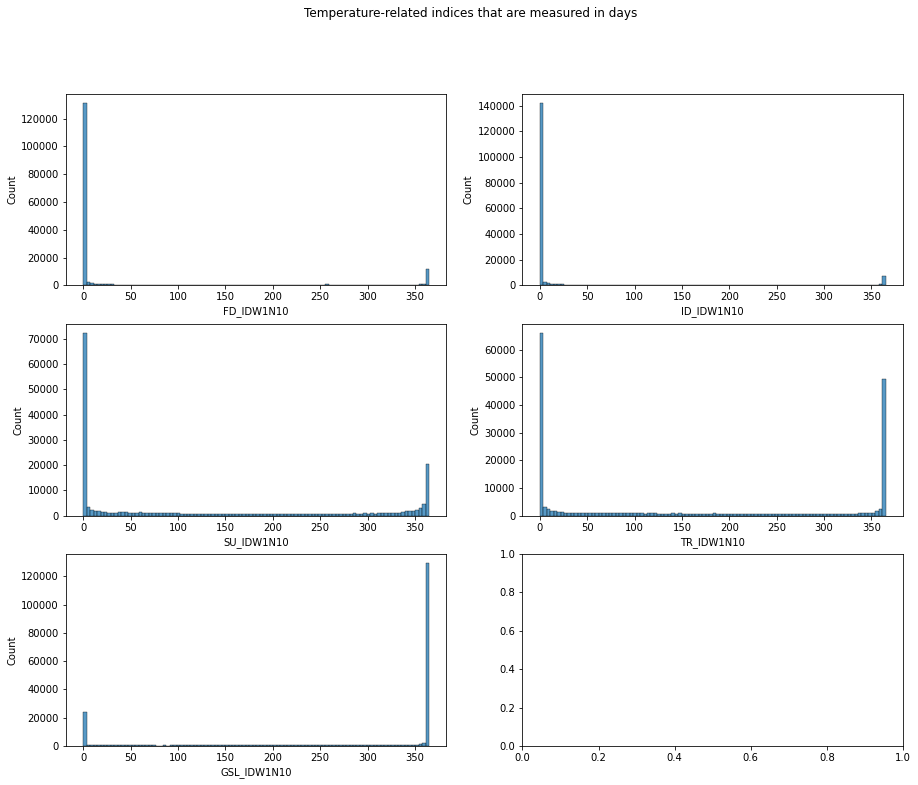

In [12]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12),sharey=False)
fig.suptitle('Temperature-related indices that are measured in days')

for idx,ax in zip(temp_days_group, axes.flat):
    sns.histplot(ax=ax,data=present[idx],bins=100)

#### 1-4. Temperature related variables, measured in percentages: TN10P, TN90P, TX10P, TX90P<a class="anchor" id="temp_pct_group"></a>

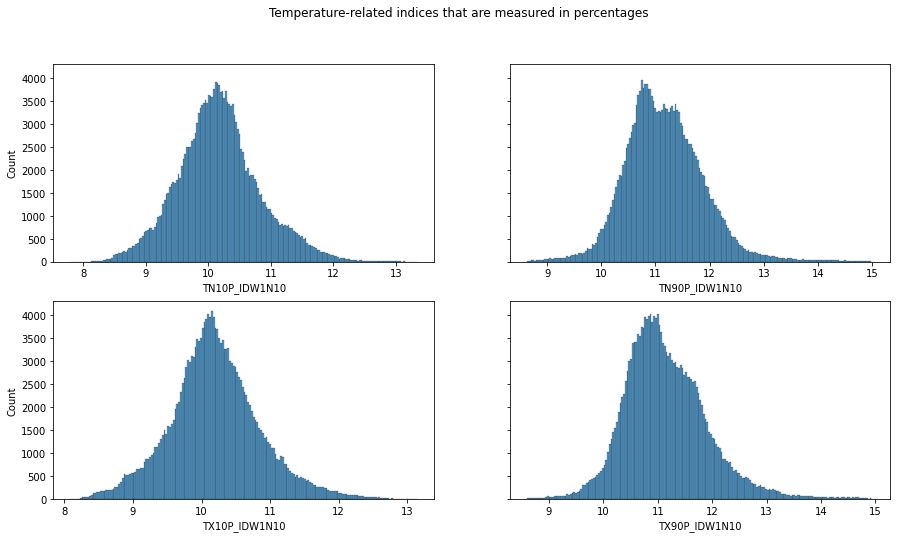

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8),sharey=True)
fig.suptitle('Temperature-related indices that are measured in percentages')

for idx,ax in zip(temp_pct_group, axes.flat):
    sns.histplot(ax=ax,data=present[idx])

#### 1-5. Temperature related variables, measured in degrees: TNN, TNX, TXN, TXX, DTR<a class="anchor" id="temp_deg_group"></a>

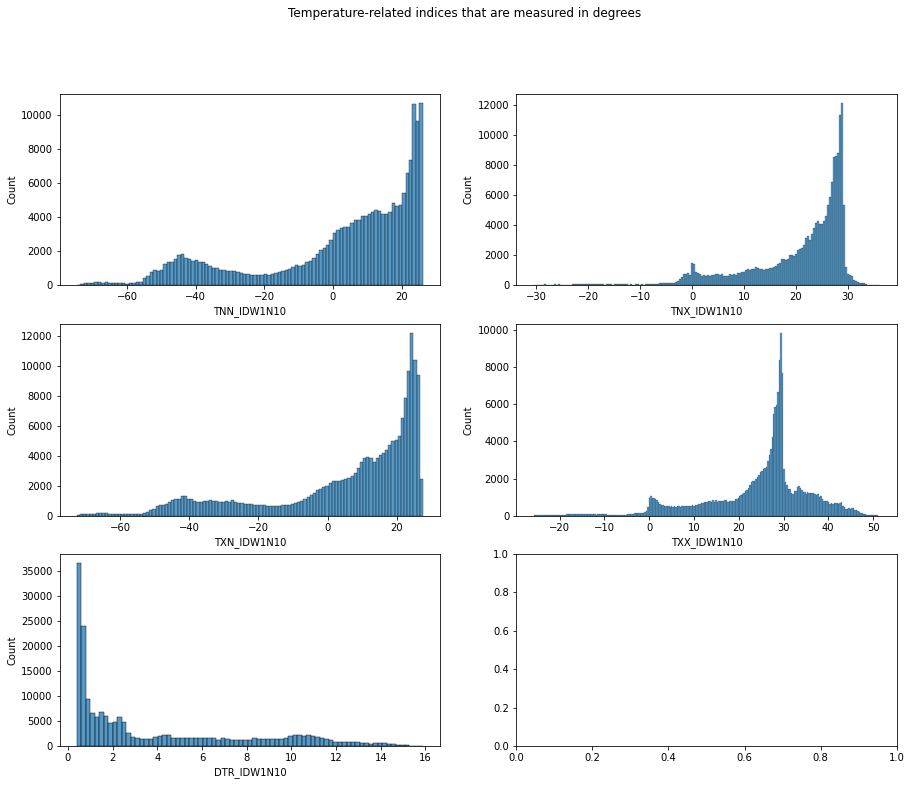

In [14]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12),sharey=False)
fig.suptitle('Temperature-related indices that are measured in degrees')

for idx,ax in zip(temp_deg_group, axes.flat):
    sns.histplot(ax=ax,data=present[idx])

### 2. Visualizing the correlation matrix<a class="anchor" id="1950-2000corr"></a>

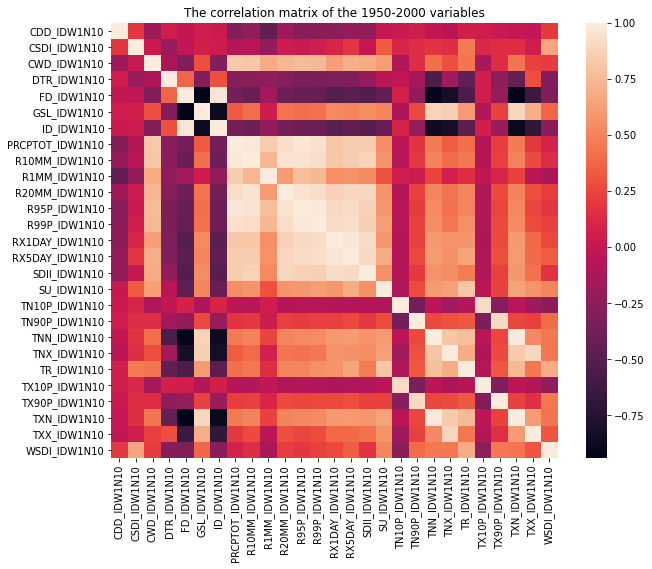

In [15]:
plt.figure(figsize=(10,8))
plt.title("The correlation matrix of the 1950-2000 variables")

corr = present.drop("HID", axis=1,inplace=False).corr()
sns.heatmap(corr)
plt.show()

## II. Exploring the variables for planned training and test areas
The test area is every landmass on Earth.

In [4]:
elephasf = datadir / "Elephas_Maximus"
# reading the data
trainhex = pd.read_csv(elephasf/"Elephas_Maximus_PA_Natural_O20.txt", sep="\t")
testhex = pd.read_csv(elephasf/"Elephas_Maximus_Predictions_GLM_Y1950_Y2000.txt", sep="\t")
testhex.sample(5)

,HID,GLM_R10,GLM_S10,GLM_DIF
48006,162383,0.392811,0.199637,-0.193174
50348,169973,0.732855,0.556225,-0.176630
35778,79618,0.000005,0.000002,-0.000003
34696,78151,0.977164,0.984650,0.007486
42546,89645,0.000000,0.000000,0.000000


In [7]:
testhex["test_area"] = 1
testhex = testhex.drop(["GLM_R10","GLM_S10","GLM_DIF"], axis=1)

In [8]:
testhex

,HID,test_area
0,75,1
1,76,1
2,77,1
3,78,1
4,79,1
...,...,...
51509,190436,1
51510,190514,1
51511,190515,1
51512,190517,1


In [9]:
testhex.to_csv("Elephas_Maximus_predarea.csv", index=False)

### 1. Visualizing histograms <a class="anchor" id="modelarea-hist"></a>

### 2. Visualizing the correlation matrix<a class="anchor" id="model-corr"></a>